In [44]:
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from IPython.display import display, Math
import corner

params = {'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'legend.fontsize': 16,
          'font.size': 16,
          'legend.fancybox': True,
          'axes.grid': True}

plt.rcParams.update(params)

labels = ['s', 'l', 'p']

In [45]:
def round_sig(x, sig=1):
    """
    Rounds a float to the given number of significant
    figures.

    Parameters
    -------------
    x    : Float
           Float to be rounded
    sig  : Integer
           Number of sig. figures
    """

    i = sig-int(np.floor(np.log10(abs(x))))-1
    return np.around(x, i), i

def plotposts(samples, kernel='RBF', **kwargs):
    """
    Function to plot posteriors using corner.py and scipy's gaussian KDE function.
    """
    
    labels = {'RBF':[r'$\log_{10}(\sigma)$', r'$\log_{10}(l)$'],
              'Local_Periodic':[r'$\log_{10}(\sigma)$', r'$\log_{10}(l)$', r'$\log_{10}(p)$'],
              'Matern':[r'$\log_{10}(\sigma)$', r'$\log_{10}(\nu)$', r'$\log_{10}(l)$']}
    
    fig = corner.corner(samples, labels=labels[kernel], 
                        hist_kwargs={'density': True}, label_kwargs={'labelpad': 10000}, **kwargs)

In [46]:
samples_rbf = np.load('HPC/pulsar_results/B0105+64RBF.npy')
samples_per = np.load('HPC/pulsar_results/B0105+64Local_Periodic.npy')
samples_mat = np.load('HPC/pulsar_results/B0105+64Matern.npy')

Number of independent samples is 38500


<IPython.core.display.Math object>

<IPython.core.display.Math object>

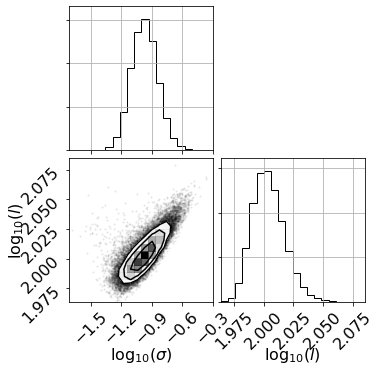

In [4]:
plotposts(samples_rbf)
print("Number of independent samples is {}".format(len(samples_rbf)))
#plt.savefig('rbf_res.pdf')

for i in range(len(samples_rbf[0])):
    mcmc = np.percentile(10**samples_rbf[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

Number of independent samples is 23900


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

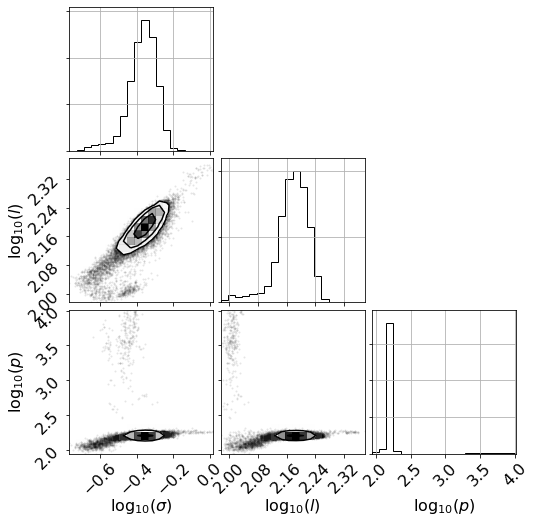

In [5]:
plotposts(samples_per, kernel='Local_Periodic')
print("Number of independent samples is {}".format(len(samples_per)))
#plt.savefig('local_periodic_res.pdf')

for i in range(len(samples_per[0])):
    mcmc = np.percentile(10**samples_per[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

Number of independent samples is 17300


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

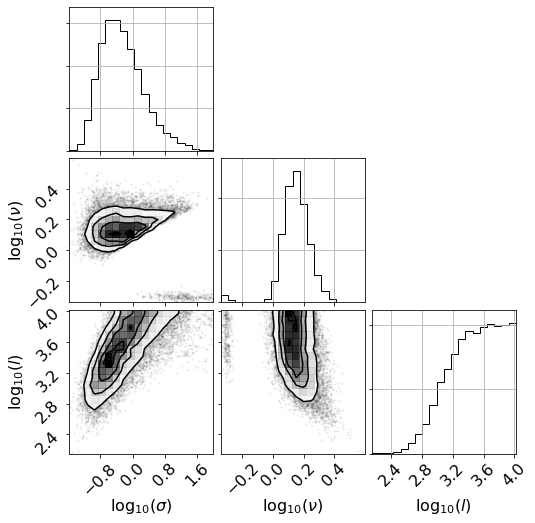

In [47]:
plotposts(samples_mat, kernel='Matern')
print("Number of independent samples is {}".format(len(samples_mat)))
plt.savefig('matern.pdf')

labels = ['s', 'v', 'l']
for i in range(len(samples_mat[0])):
    mcmc = np.percentile(10**samples_mat[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

In [85]:
x = np.linspace(0,10,1000)
y_training = np.sin(x)[::350]
x_training = x[::350]
sigma = np.array([0.1,0.2,0.3])

theta = np.log10(np.array([1., 1000., 1.]))
theta_rbf = np.log10(np.array([1.,1.]))
mat_cov = gp.matern(10**theta, x)


gp_mat = gp.GP(gp.matern, theta, [x, x_training, y_training], sigma=sigma)
gp_rbf = gp.GP(gp.rbf, theta_rbf, [x, x_training, y_training], sigma=sigma)

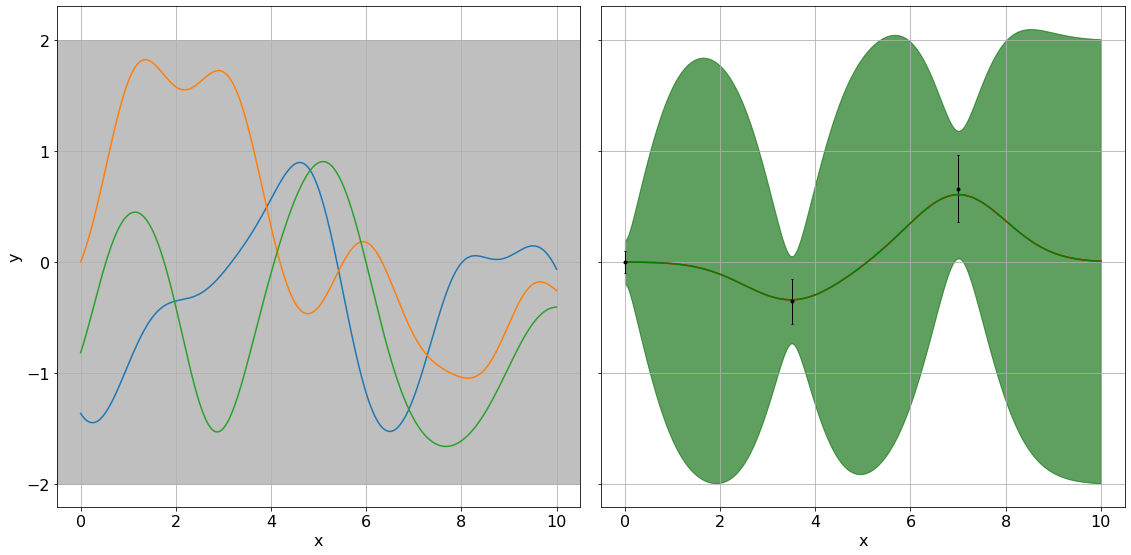

In [86]:
fig, ax = plt.subplots(ncols=2, figsize=(16,8), sharey=True)
ax1,ax2 = ax.flatten()
seeds = [42,420,69]

for i in range(3):
    np.random.seed(seeds[i])
    ax1.plot(x, multivariate_normal.rvs(cov=rbf_cov))

ax1.axhspan(-2,2, color='gray', alpha=0.5)
ax2.errorbar(x_training, y_training, yerr=sigma, fmt='.k', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax2.plot(x, gp_mat[0], c='r')
ax2.fill_between(x, gp_mat[0]-2*gp_mat[1], gp_mat[0]+2*gp_mat[1], color='gray', alpha=0.5)

ax2.plot(x, gp_rbf[0], c='g')
ax2.fill_between(x, gp_rbf[0]-2*gp_rbf[1], gp_rbf[0]+2*gp_rbf[1], color='g', alpha=0.5)

ax1.set(ylabel='y', xlabel='x')
ax2.set(xlabel='x')
fig.tight_layout()
#plt.savefig('GP_training.pdf')

In [3]:
np.log(kv(1.2, 2.1))

-2.0119261900820122

## Lomb Scargle

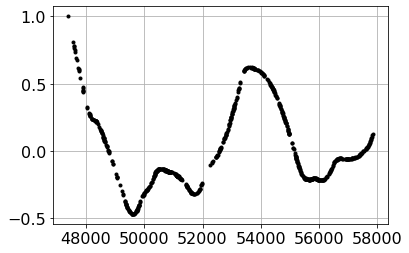

In [16]:
B0105 = np.loadtxt('Data/B0105+64.asc', usecols=(0,1,2,7))

plt.figure()
plt.plot(B0105[:,0], B0105[:,1], 'k.')

In [10]:
from astropy.timeseries import LombScargle

frequency, power = LombScargle(B0105[:,0], B0105[:,1]).autopower()

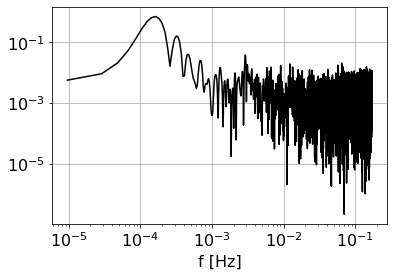

In [17]:
plt.loglog(frequency, power, c='k') 
plt.xlabel('f [Hz]')
plt.ylabel=('P(f)')
plt.savefig('psd.pdf')

In [40]:
u = np.random.uniform(1E-16,3E-16, size=1000000)

0

In [62]:
np.abs(lg(5.2+0.j))

3.483640162249912

1e+20